In [2]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import phoebe
from phoebe import u
%matplotlib inline

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


In [2]:
phoebe.update_all_passbands(local=True, content=None)

## TESS light curve plotting

In [3]:
#search TESS light curves
J0938_coordinates = '144.60908 25.473091'
J0045_coordinates = '0.18784 6.49496'
J0556_coordinates = '1.48694 -1.476551'
J0654_coordinates = '103.50797 75.457218'
target_coordinates = '08:31:18.6 -08:18:56'
lc = lk.search_lightcurve(J0045_coordinates, mission='TESS')#.download()
lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 42,2021,TESS-SPOC,600,418735227,0.0
1,TESS Sector 70,2023,TESS-SPOC,200,418735227,0.0
2,TESS Sector 42,2021,QLP,600,418735227,0.0
3,TESS Sector 70,2023,QLP,200,418735227,0.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


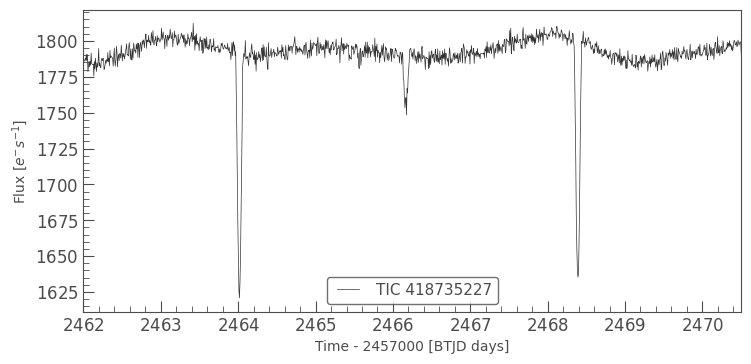

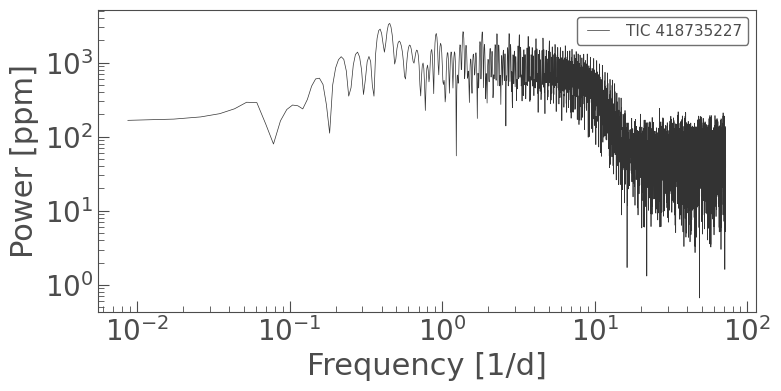

In [10]:
lightcurve = lc.download()
# start_time = 2462
# end_time = 2471
# filtered_lc = lightcurve[(lightcurve.time.value >= start_time) & (lightcurve.time.value <= end_time)]
# filtered_lc.plot()
lightcurve.plot()
# plt.xticks(fontsize = 20)
# plt.yticks(np.arange(740, 920, step=80), fontsize = 20)
# plt.xlabel('Time - 2457000 [BTJD days]', fontsize = 22)
plt.ylabel('Flux [$e^{-} s^{-1}$]', fontsize = 10)
plt.xlim(2462,2470.5)
# plt.ylim(220,270)
pg = lightcurve.normalize(unit='ppm').to_periodogram()
pg.plot(scale='log')
plt.xticks(fontsize = 20)
plt.yticks( fontsize = 20)
plt.ylabel('Power [ppm]', fontsize = 22)
plt.xlabel('Frequency [1/d]', fontsize = 22)
plt.savefig('/Users/mac/Desktop/cassi/light_curves/J065401.91+752725.9/TESS/periodogram.png')

In [5]:
lightcurve

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2447.7027638245213,1.7949303e+03,3.4446518e+00,4.7377986e-03,175714,870.10263,2039.23827,1.4221782e+03,2.5517795e+00,8.7500659e+02,9.3816751e-01,1.7949303e+03,3.4446518e+00,0,———,———,———,———,870.10263,1.1511378e-03,2039.23827,1.0565978e-03,-5.8947824e-02,-1.0299020e-01
2447.709708675976,1.7996543e+03,3.4485886e+00,4.7382088e-03,175715,870.10560,2039.23709,1.4257266e+03,2.5546958e+00,8.7526251e+02,9.3838149e-01,1.7996543e+03,3.4485886e+00,0,———,———,———,———,870.10560,1.1487599e-03,2039.23709,1.0566589e-03,-5.8043808e-02,-1.0152997e-01
2447.7235983779524,1.7927076e+03,3.4457741e+00,4.7390284e-03,175717,870.10586,2039.23847,1.4210333e+03,2.5526109e+00,8.7591718e+02,9.4031382e-01,1.7927076e+03,3.4457741e+00,0,———,———,———,———,870.10586,1.1525928e-03,2039.23847,1.0576717e-03,-5.9264328e-02,-1.0162392e-01
2447.7305432280095,1.7980021e+03,3.4471724e+00,4.7394373e-03,175718,870.10613,2039.24404,1.4247911e+03,2.5536468e+00,8.7430475e+02,9.3762428e-01,1.7980021e+03,3.4471724e+00,0,———,———,———,———,870.10613,1.1513005e-03,2039.24404,1.0559920e-03,-5.7442017e-02,-9.4632991e-02
2447.7374880780676,1.7892738e+03,3.4446640e+00,4.7398461e-03,175719,870.11071,2039.24043,1.4191118e+03,2.5517883e+00,8.7294153e+02,9.3838257e-01,1.7892738e+03,3.4446640e+00,0,———,———,———,———,870.11071,1.1547853e-03,2039.24043,1.0605106e-03,-5.3354513e-02,-9.9277996e-02
2447.7444329281248,1.7945944e+03,3.4430573e+00,4.7402550e-03,175720,870.10714,2039.24402,1.4225248e+03,2.5505984e+00,8.7258716e+02,9.3694365e-01,1.7945944e+03,3.4430573e+00,0,———,———,———,———,870.10714,1.1512197e-03,2039.24402,1.0568235e-03,-5.7863511e-02,-9.3793474e-02
2447.7513777772506,1.7906771e+03,3.4443812e+00,4.7406629e-03,175721,870.10755,2039.24068,1.4201240e+03,2.5515790e+00,8.7293091e+02,9.3744719e-01,1.7906771e+03,3.4443812e+00,0,———,———,———,———,870.10755,1.1532445e-03,2039.24068,1.0602192e-03,-5.3659212e-02,-9.7301438e-02
2447.7583226263773,1.7916974e+03,3.4430091e+00,4.7410708e-03,175722,870.10701,2039.24088,1.4203954e+03,2.5505626e+00,8.7289948e+02,9.3732387e-01,1.7916974e+03,3.4430091e+00,0,———,———,———,———,870.10701,1.1532789e-03,2039.24088,1.0574794e-03,-5.4266527e-02,-9.8175414e-02


In [6]:
pg.show_properties()
period = pg.period_at_max_power

lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid      418735227      
          default_view      frequency      
                 label  TIC 418735227      
             ls_method           fast      
frequency_at_max_power         0.4527 1 / d
             max_power      3371.6723   ppm
               nyquist        71.9978 1 / d
   period_at_max_power         2.2089     d
             frequency  array (8270,) 1 / d
                period  array (8270,)     d
                 power  array (8270,)   ppm
                  meta <class 'dict'>      


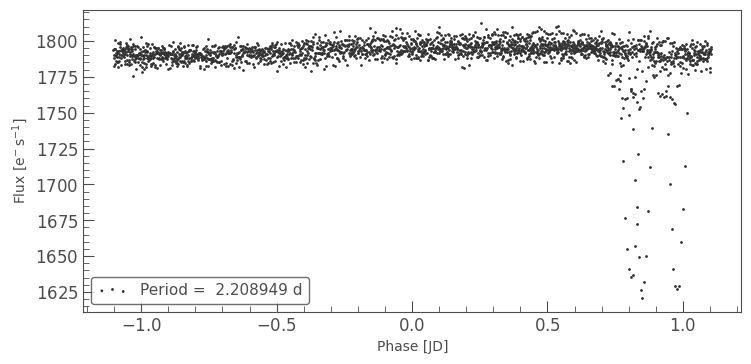

In [7]:
lightcurve.fold(period).scatter(label=fr'Period = {period: 5f}');
# plt.xticks(np.arange(-1, 1, step=0.3), fontsize = 20)
# plt.yticks(np.arange(4406, 4428, step=5), fontsize = 20)
# plt.xlabel('Phase', fontsize = 30)
# plt.ylabel('Flux [$e^{-} s^{-1}$]', fontsize = 30)

## ASAS-SN plotting

/var/folders/69/qyn6t8gs2d72s601sh3t50sc0000gn/T/ipykernel_27765/3778811596.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


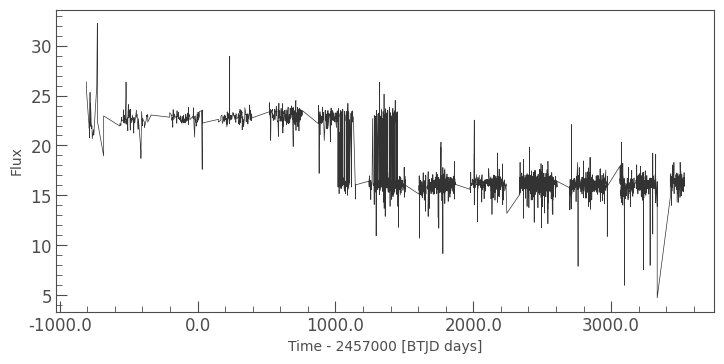

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

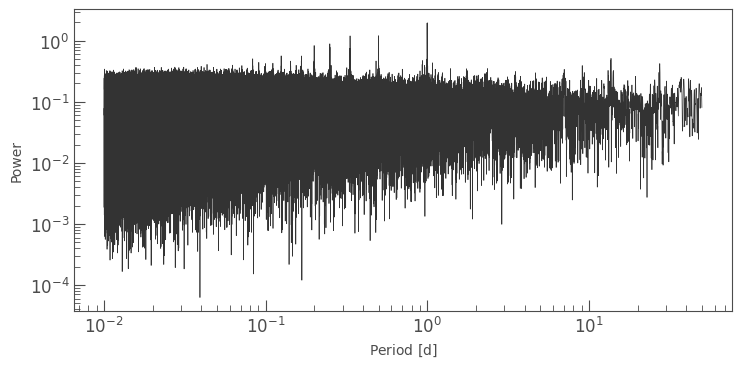

In [8]:
df = pd.read_csv('/Users/mac/Desktop/cassi/light_curves/J000045.08+062941.8/ASAS-SN/ASAS-SN_lc.csv')
df_V = df[(df['flux(mJy)'] != 99.990)]
lc = lk.LightCurve(time=df_V['HJD'], flux=df_V['flux(mJy)'], flux_err=df_V['flux_err'])
# start_time = -1000 + 2457000
# end_time = 1000 + 2457000
# filtered_lc = lc[(lc.time.value >= start_time) & (lc.time.value <= end_time)]
# filtered_lc.plot()
lc.plot()
current_labels = plt.gca().get_xticks()
new_labels = current_labels - 2457000
plt.gca().set_xticklabels(new_labels)
plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Flux')
plt.show()
pg = lc.to_periodogram(minimum_period = 0.01, maximum_period = 50)
pg.plot(view='period', scale='log')

In [9]:
pg.show_properties()
period = pg.period_at_max_power
period = 4.18

lightkurve.Periodogram properties:
      Attribute                   Description            Units
---------------------- --------------------------------- -----
                nterms                                 1      
          default_view                            period      
             ls_method                              fast      
frequency_at_max_power                            0.9999 1 / d
             max_power                            1.9633      
               nyquist                          387.5969 1 / d
   period_at_max_power                            1.0001     d
             frequency                  array (2168096,) 1 / d
                period                  array (2168096,)     d
                 power                  array (2168096,)      
                 label                <class 'NoneType'>      
                  meta <class 'collections.OrderedDict'>      
              targetid                <class 'NoneType'>      


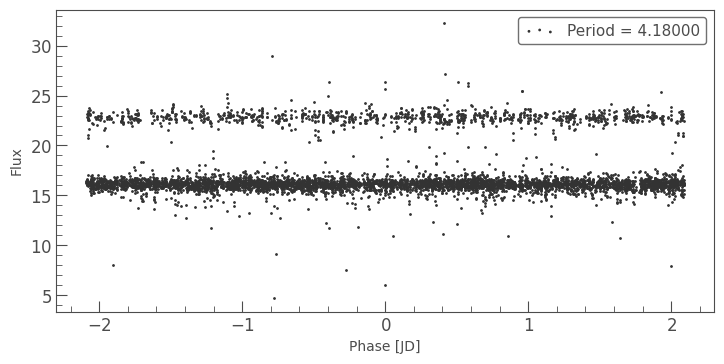

In [10]:
folded_lc = lc.fold(period).scatter(label=fr'Period = {period:.5f}')
# flux_mask = (folded_lc.flux.value > 5) & (folded_lc.flux.value <8)
# filtered_folded_lc = folded_lc[flux_mask]
# plt.figure(figsize=(10, 5))
# plt.plot(filtered_folded_lc.time.value, filtered_folded_lc.flux.value, 'k.', markersize=1)
# plt.xlabel('Phase')
# plt.ylabel('Flux')
# plt.title(f'Folded Light Curve (Period = {period * 4})')

## PHOEBE fitting

In [6]:
#normalize the light curve
# normalized_lc = lightcurve.normalize()
# folded_lc = normalized_lc.fold(0.1105 * 2)
# folded_lc.plot()
# normalized_lc.plot()
df_lc = lightcurve.to_pandas().dropna(subset=['flux', 'flux_err'])
df_lc.to_excel('/Users/mac/Desktop/cassi/light_curves/J032724.68+504105.5/TESS.xlsx')
df_lc = pd.read_excel('/Users/mac/Desktop/cassi/light_curves/J032724.68+504105.5/TESS.xlsx')

In [7]:
df_lc_filtered = df_lc[(df_lc.time.values > 1495) & (df_lc.time.values < 1499)]
lightcurve

time,flux,flux_err,barycorr,raw_flux,cadenceno,centroid_col,centroid_row,corr_flux,quality,x_centroid,y_centroid,x_com,y_com,flux_bkg,ffiindex,pca_flux,raw_flux_err
,electron / s,electron / s,d,electron / s,,pix,pix,electron / s,,pix,pix,pix,pix,%,,electron / s,electron / s
Time,float32,float32,float32,float32,int64,float32,float32,float32,int32,float32,float32,float32,float32,float32,int64,float32,float32
1491.6613936135477,309.90625,1.040701985359192,0.00463261129334569,247.05160522460938,12681,92.19810485839844,52.558021545410156,309.90625,262144,92.19810485839844,52.558021545410156,7.142653465270996,7.79597806930542,172.4838104248047,12681,250.86904907226562,0.829628586769104
1491.6822277347212,302.2604064941406,1.0104942321777344,0.004633408039808273,245.69808959960938,12682,92.19889068603516,52.55945587158203,302.2604064941406,262144,92.19889068603516,52.55945587158203,7.151642799377441,7.799978256225586,166.12159729003906,12682,249.35507202148438,0.8213993310928345
1491.7030618533659,292.452880859375,0.9777452945709229,0.004634201992303133,242.3394775390625,12683,92.19879150390625,52.56055450439453,292.452880859375,262144,92.19879150390625,52.56055450439453,7.146100044250488,7.806451320648193,160.1860809326172,12683,245.78379821777344,0.8102033138275146
1491.7238959697336,285.43475341796875,0.9503834843635559,0.004634993616491556,241.12673950195312,12684,92.19891357421875,52.56105041503906,285.43475341796875,262144,92.19891357421875,52.56105041503906,7.1429924964904785,7.804314136505127,154.1084747314453,12684,244.51019287109375,0.8028555512428284
1491.7447300841027,285.1268310546875,0.9202595949172974,0.00463578337803483,246.46656799316406,12685,92.19901275634766,52.56184387207031,285.1268310546875,262144,92.19901275634766,52.56184387207031,7.145464897155762,7.800649166107178,148.17276000976562,12685,249.96624755859375,0.7954818606376648
1491.765564196778,284.24468994140625,0.8964487314224243,0.004636571276932955,250.32611083984375,12686,92.1991958618164,52.562461853027344,284.24468994140625,262144,92.1991958618164,52.562461853027344,7.156637191772461,7.801743507385254,142.9331817626953,12686,253.7809600830078,0.7894765734672546
1491.7863983080802,279.9482421875,0.8745676279067993,0.0046373577788472176,250.55641174316406,12687,92.1991958618164,52.563262939453125,279.9482421875,262144,92.1991958618164,52.563262939453125,7.154499053955078,7.801957130432129,138.239501953125,12687,254.053955078125,0.7827465534210205
1491.8072324183427,277.7485656738281,0.8545175790786743,0.004638143349438906,252.6558074951172,12688,92.19718933105469,52.56058120727539,277.7485656738281,262144,92.19718933105469,52.56058120727539,7.16007137298584,7.800770282745361,133.67453002929688,12688,255.95619201660156,0.7773175239562988


In [8]:
logger = phoebe.logger()
times = df_lc_filtered.time.values
fluxes = df_lc_filtered.flux.values
errs = df_lc_filtered.flux_err.values
# t_rv = [2460507.88, 2460528.96, 2460531.97, 2460535.94]
# rv = [-120.7, -164.3, -162.2, -143.5] 
# rv_err = [0.4, 0.8, 1.0, 0.6] 
b = phoebe.default_binary()
b.add_dataset('lc', compute_times=phoebe.linspace(1495, 1499, 200),
              times=times, fluxes=fluxes, sigmas=errs, dataset='lcg')
# b.add_dataset('rv', compute_times = phoebe.linspace(-4, 4, 220), times = t_rv, rvs = rv, sigma_rvs = rv_err)
period = 0.30316 * 2 #from periodogram
teff = 5786	
mass = 0.5
logg = 4.273

b.flip_constraint('mass@primary', solve_for='sma@binary')
b.set_value('period@binary', period) 
b.set_value('mass@primary', mass)
b.set_value('teff@primary', teff)
b.set_value('requiv@primary', 0.5)
b.set_value('requiv@secondary', 0.5)
b.set_value('distortion_method@secondary@phoebe01', value = 'sphere')
# b.set_value('teff@secondary', 300)
# b.set_value('ntriangles@secondary', 100)

b.set_value('atm@secondary@phoebe01', 'blackbody')
b.set_value_all('ld_mode@primary', 'lookup')
b.set_value_all('ld_mode@secondary', value='manual')
b.set_value_all('ld_func@secondary', value='linear')
b.set_value_all('ld_coeffs@secondary', value=[0])

b.set_value_all('ld_mode_bol', component='secondary', value='manual')
b.set_value_all('ld_coeffs_bol', component='secondary', value=[0])

b.set_value('irrad_method@phoebe01', 'none')
b.set_value('eclipse_method@phoebe01', 'native')
b.set_value_all('pblum_mode', 'dataset-scaled')

print(b['component'])
# b = phoebe.default_binary()
# b.set_hierarchy('orbit:binary(star:secondary, star:primary)')
# b['period@binary'] = 4.0165*2
# b.flip_constraint('mass@primary', solve_for='sma@binary')
# b['mass@primary@component'] = 0.75
# b['teff@secondary@component'] = 6214.09
# b.add_dataset('lc', times= np.array(df_lc['time']), fluxes= np.array(df_lc['flux']), dataset='lc01')
# b.run_compute(eclipse_method='only_horizon')
# print(b.get_parameter(qualifier='fluxes', dataset='lc01', context='dataset'))
# b.plot(x='phases', show=True)

ParameterSet: 62 parameters
         requiv@primary@component: 0.5 solRad
C    requiv_max@primary@component: 1.1451603988824746 solRad
           teff@primary@component: 5786.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.739097627930433
        syncpar@primary@component: 1.0
C        period@primary@component: 0.60632 d
C          freq@primary@component: 10.362819963055811 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 90.0 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
           mass@primary@component: 0.5 solMass
       requiv@secondary@component: 0.5 solRad
C  requiv_max@secondary@component: 1.1451603988824746 solRad
         

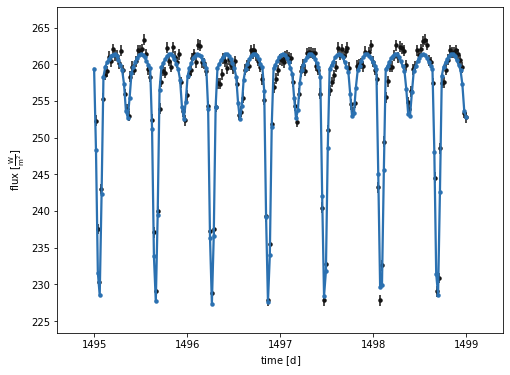

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [15]:
# b.run_compute(model='before_de')
b.plot(model='before_de', show=True, marker='.', x='times', sizes = 60)

In [9]:
# starhorse_radius = 13
b.add_solver('optimizer.differential_evolution', solver='de_solver', overwrite=True)
b.set_value('maxiter', 100)
fit_params = ['q', 't0_supconj', 'incl@binary', 'requiv@primary', 'requiv@secondary', 'mass@primary', 'teff@secondary']

b.add_distribution('q', phoebe.uniform(0.1, 10), distribution='de_bounds')
b.add_distribution('t0_supconj',
                   phoebe.uniform(np.min(times)-period/2, np.min(times)+period/2),
                   distribution='de_bounds')
b.add_distribution('incl@binary', phoebe.uniform(25, 90), distribution='de_bounds')
b.add_distribution('requiv@primary', phoebe.gaussian(0.5,2),
                   distribution='de_bounds')
b.add_distribution('requiv@secondary', phoebe.gaussian(0.5,2),
                   distribution='de_bounds')
b.add_distribution('mass@primary', phoebe.gaussian(0.3,2),
                   distribution='de_bounds')
b.add_distribution('teff@secondary', phoebe.gaussian(2000, 7000),
                   distribution='de_bounds')

b.set_value('fit_parameters@de_solver', fit_params)
b.set_value('bounds@de_solver', ['de_bounds'])

b.run_solver('de_solver', solution='de_sol')
b.adopt_solution()
b.run_compute(model='after_de')

Sun, 01 Dec 2024 21:00 BUNDLE       WARNING all non-uniform distributions in None will be converted to uniforms by adopting sigma=3
 22%|██▏       | 22/100 [01:53<11:16,  8.67s/it]Warning: Projection did not converge
Start
0.3012888186340943 0.007551652805328081 -0.01432123511365042
1.729165077808363 0.3639779958238656 -0.7995437622133145
0.01300513868177688
End
0.2956159489694818 0.008473170324237646 -0.0121781592398686
2.419610990741391 0.4227539213512753 -0.7005368175874691
-1.77635683940025e-15
 72%|███████▏  | 72/100 [17:17<11:57, 25.64s/it]Warning: Projection did not converge
Start
0.3052858973660594 -0.008396116705350638 -0.0005915484356010287
0.8260281693714434 -0.4022156029580793 -0.03304831737839799
0.002590996455317907
End
0.3030700116480871 -0.007160899231139072 -0.0005872370778851818
1.094895459303147 -0.3472688120219383 -0.0331540306290006
-1.77635683940025e-15
 82%|████████▏ | 82/100 [21:22<06:55, 23.08s/it]Warning: Projection did not converge
Start
0.2918638552556664 0.

<ParameterSet: 4 parameters | qualifiers: flux_scale, fluxes, times, comments>

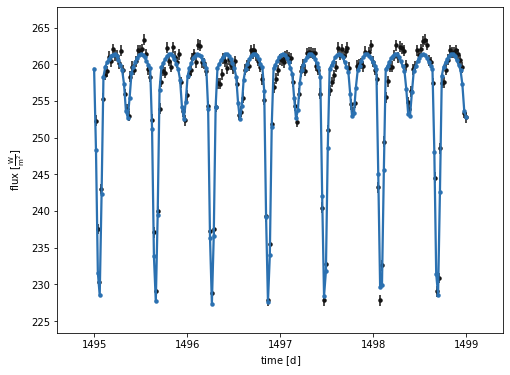

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [10]:
b.plot(model='after_de', show=True, x='times', marker='.')

In [12]:
afig, mplanim = b['mesh01@model'].plot(times=times[:-1], fc='teffs', ec='None', 
                       animate=True, save='animations_4.gif', save_kwargs={'writer': 'imagemagick'})

Sun, 01 Dec 2024 21:33 matplotlib.animation WARNING MovieWriter imagemagick unavailable; using Pillow instead.


ValueError: Nothing could be found to plot.  Check all arguments.

<Figure size 576x432 with 0 Axes>

In [ ]:
logger = phoebe.logger()
times = df_lc.time.values
fluxes = df_lc.flux.values
errs = df_lc.flux_err.values
b = phoebe.default_binary()
b.add_dataset('lc', compute_phases=phoebe.linspace(-4, 4, 220),
              times=times, fluxes=fluxes, sigmas=errs, dataset='lcg')
period = 0.1105 * 2 #from periodogram
teff = 4470.31	
mass = 0.5
logg = 4.05

b.flip_constraint('mass@primary', solve_for='sma@binary')
b.set_value('period@binary', period) 
b.set_value('mass@primary', mass)
b.set_value('teff@primary', teff)
b.set_value('requiv@primary', 0.5)
b.set_value('requiv@secondary', 0.5)
b.set_value('distortion_method@secondary@phoebe01', value='none')
# b.set_value('teff@secondary', 300)
# b.set_value('ntriangles@secondary', 100)

b.set_value('atm@secondary@phoebe01', 'blackbody')
b.set_value_all('ld_mode@primary', 'lookup')
b.set_value_all('ld_mode@secondary', value='manual')
b.set_value_all('ld_func@secondary', value='linear')
b.set_value_all('ld_coeffs@secondary', value=[0])

b.set_value_all('ld_mode_bol', component='secondary', value='manual')
b.set_value_all('ld_coeffs_bol', component='secondary', value=[0])

b.set_value('irrad_method@phoebe01', 'none')
b.set_value('eclipse_method@phoebe01', 'only_horizon')
b.set_value_all('pblum_mode', 'dataset-scaled')

print(b['component'])

ParameterSet: 62 parameters
         requiv@primary@component: 0.5 solRad
C    requiv_max@primary@component: 2.0132751765376384 solRad
           teff@primary@component: 4470.31 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.437551877570185
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 90.0 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
           mass@primary@component: 0.5 solMass
       requiv@secondary@component: 0.5 solRad
C  requiv_max@secondary@component: 2.0132751765376384 solRad
         teff@secondar

In [ ]:
starhorse_radius = 13
b.add_solver('optimizer.differential_evolution', solver='de_solver', overwrite=True)
b.set_value('maxiter', 100)
fit_params = ['q', 't0_supconj', 'incl@binary', 'teff@primary']

b.add_distribution('q', phoebe.uniform(0.1, 10), distribution='de_bounds')
b.add_distribution('t0_supconj',
                   phoebe.uniform(np.min(times)-period/2, np.min(times)+period/2),
                   distribution='de_bounds')
b.add_distribution('incl@binary', phoebe.uniform(25, 90), distribution='de_bounds')
b.add_distribution('teff@primary', phoebe.gaussian(teff,4000),
                   distribution='de_bounds')

b.set_value('fit_parameters@de_solver', fit_params)
b.set_value('bounds@de_solver', ['de_bounds'])

b.run_solver('de_solver', solution='de_sol')
b.adopt_solution()
b.run_compute(model='after_de')

Mon, 19 Aug 2024 23:45 BUNDLE       WARNING all non-uniform distributions in None will be converted to uniforms by adopting sigma=3
 28%|██▊       | 28/100 [03:30<09:17,  7.75s/it]Mon, 19 Aug 2024 23:49 BUNDLE       WARNING ld_mode_bol of 'lookup' uses a bolometric passband which is not reliable for hot stars.  Consider using ld_mode_bol of manual and providing ld_coeffs instead.
Mon, 19 Aug 2024 23:49 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=14223K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Mon, 19 Aug 2024 23:49 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=14223K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Mon, 19 Aug 2024 23:49 BUNDLE       WARNING ld_mode_bol of 'lookup' uses a bolometric passband which is not reliable for hot stars.  Consider using ld_mode_bol of manual and providing ld_coeffs instead.
Mon, 19 Aug 2024 23:49 BUN

<ParameterSet: 4 parameters | qualifiers: comments, times, fluxes, flux_scale>

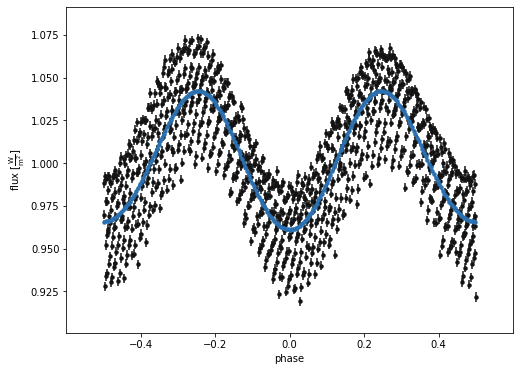

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [ ]:
b.plot(model='after_de', show=True, x='phases', marker='.')

In [ ]:
print(b)

PHOEBE Bundle: 224 parameters
                        t0@system: 0.0 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.0
                        Av@system: 0.0
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary)
         requiv@primary@component: 0.5 solRad
C    requiv_max@primary@component: 0.5621156027175785 solRad
           teff@primary@component: 14223.480252158126 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.739097627930433
        syncpar@primary@component: 1.0
C        period@primary@component: 0.221 d
C          freq@primary@component: 28.43070135746606 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 56.2750767925362 deg
C       long_an@prima

In [ ]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()
b.set_value('q', 0.8)
b.set_hierarchy('orbit:binary(star:secondary, star:primary)')
b.flip_constraint('mass@secondary@constraint', 'period')
b.set_value(qualifier='mass', component='secondary', context='component', value=0.75)